Davies-Bouldin Index: 1.1714695644070179


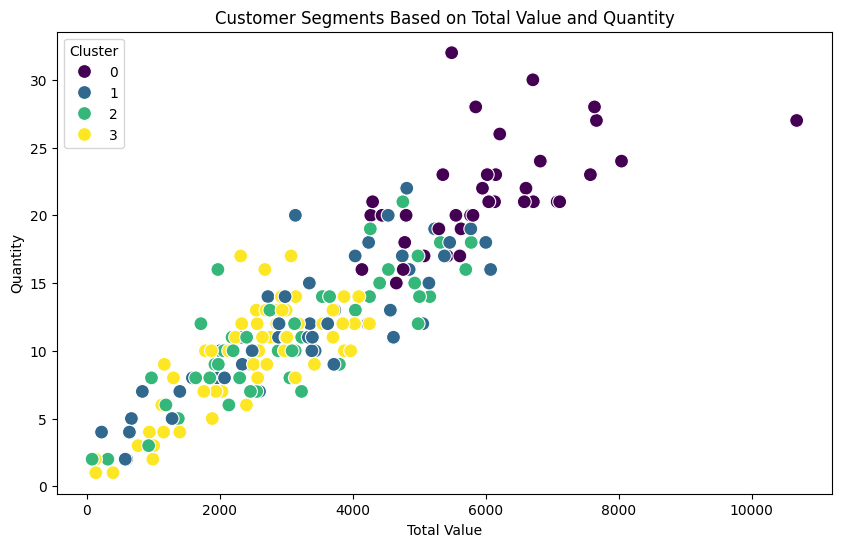

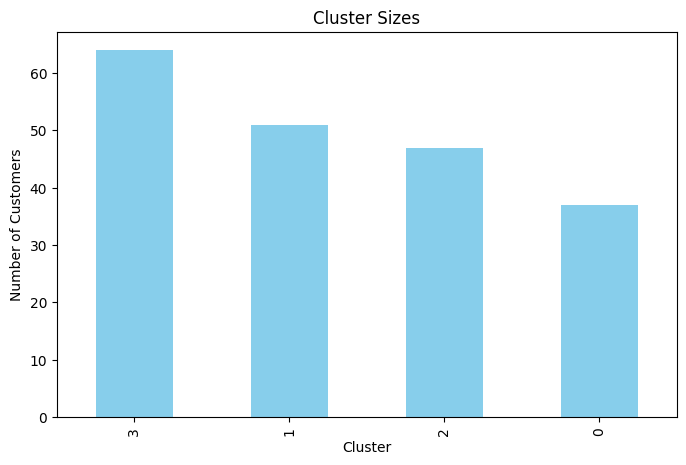

Number of Clusters: 4
Davies-Bouldin Index: 1.1714695644070179
  CustomerID  Cluster
0      C0001        1
1      C0002        3
2      C0003        1
3      C0004        0
4      C0005        3
5      C0006        1
6      C0007        3
7      C0008        0
8      C0009        2
9      C0010        2


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Aggregate transaction data for clustering
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Add customer profile information
customer_features = customer_features.merge(customers, on='CustomerID')

# Encode categorical variables (e.g., Region)
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Normalize the data
features_to_scale = ['TotalValue', 'Quantity', 'Price'] + [col for col in customer_features.columns if 'Region_' in col]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[features_to_scale])

# Clustering using KMeans
num_clusters = 4  # You can experiment with different values (between 2 and 10)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters (using TotalValue and Quantity as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_features,
    x='TotalValue',
    y='Quantity',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title("Customer Segments Based on Total Value and Quantity")
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.legend(title='Cluster')
plt.show()

# Visualize cluster sizes
plt.figure(figsize=(8, 5))
customer_features['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

# Save clustering results
customer_features[['CustomerID', 'Cluster']].to_csv("Customer_Clusters.csv", index=False)

# Print clustering summary
print(f"Number of Clusters: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print(customer_features[['CustomerID', 'Cluster']].head(10))
